In [1]:
import pandas as pd
import math
import numpy as np

In [8]:
# Đọc dữ liệu
df_list = []

for i in range(10):
    df_list.append(pd.read_csv(f"./data/page_ha-noi_{i}.csv"))

for i in range(10):
    df_list.append(pd.read_csv(f"./data/page_tp-ho-chi-minh_{i}.csv"))

for i in range(3):
    df_list.append(pd.read_csv(f"./data/page_da-nang_{i}.csv"))

# for i in range(2):
#     df_list.append(pd.read_csv(f"./data/page_nha_dat_da-nang_{i}.csv"))
    
# for i in range(3):
#     df_list.append(pd.read_csv(f"./data/page_nha_dat_ha-noi_{i}.csv"))

# for i in range(4):
#     df_list.append(pd.read_csv(f"./data/page_nha_dat_tp-ho-chi-minh_{i}.csv"))

df = pd.concat(df_list, ignore_index=True)


# Quy chuẩn lại tên cột


df.columns = [
    "Area",  # Diện tích đất
    "Bedroom",  # Phòng ngủ
    "Bathroom",  # Phòng vệ sinh
    "Paper",  # Các loại giấy tờ pháp lý
    "Type",  # Loại hình nhà ở
    "Width",  # Chiều rộng
    "UseageArea",  # Diện tích sử dụng
    "Price/m2",  # Giá 1m2
    "MainDirection",  # Hướng của chính
    "Floor",  # Tổng số tầng
    "Charistic",  # Đặc điểm nhà đất
    "Furniture",  # Tình hình nội thất
    "Length",  # Chiều dài
    "Location",  # Vị trí địa lý
    "Name",
    "Url",
    "District",
    "Price",
]


df.isnull().sum()

# df["đ/m²" in df["Price/m2"]]

Area                0
Bedroom             0
Bathroom          535
Paper             443
Type               17
Width            1505
UseageArea       1831
Price/m2            0
MainDirection    1555
Floor             566
Charistic        1851
Furniture        1205
Length           1808
Location            0
Name                0
Url              2006
District            0
Price            2006
dtype: int64

In [9]:
# Xóa cột thừa ( Chiều dài - thiếu dữ liệu, Chiều rộng - thiếu dữ liệu, Name+URL - không quan trọng, Price -> Thừa )

df.drop(
    columns=[
        "Name",  # khong quan trong
        "Url",  # khong lien quan
        "Price",  # ko su dung vi su dung price/m2
    ],
    inplace=True,
)
df.dropna(subset=["Price/m2"], inplace=True)
df.dropna(subset=["Area"], inplace=True)

df.count()

Area             2006
Bedroom          2006
Bathroom         1471
Paper            1563
Type             1989
Width             501
UseageArea        175
Price/m2         2006
MainDirection     451
Floor            1440
Charistic         155
Furniture         801
Length            198
Location         2006
District         2006
dtype: int64

In [10]:
df.drop(
    columns=[
        "UseageArea",  
        "Charistic",
        "Length", 
        "Width",
        "MainDirection"
    ],
    inplace=True,
)
df.count()

Area         2006
Bedroom      2006
Bathroom     1471
Paper        1563
Type         1989
Price/m2     2006
Floor        1440
Furniture     801
Location     2006
District     2006
dtype: int64

In [11]:
def remove_last_text(text):
    result = ""
    if type(text) == str:
        list_char = text.split(" ")
        list_char.pop()
        result = " ".join(list_char)
    elif type(text) == float:
        result = math.nan
    return result


def list_value_field(field):
    return list(dict.fromkeys(df[field].values.tolist()))


def getConvertterNum(field, key):
    value = ""
    if isinstance(field, (int, float)):
        if math.isnan(field):
            value = "NaN"
        else:
            return field
    elif isinstance(field, (str)):
        if field.isnumeric() and field != "NaN":
            return float(field)
        else:
            value = field.lower()
    return convertter[key][value]



#  "District": {
#         "quận hà đông": 1,
#         "quận ba đình": ,
#         "quận cầu giấy": ,
#         "quận đống đa",
#         "huyện gia lâm",
#         "quận thanh xuân",
#         "quận tây hồ",
#         "quận hoàng mai",
#         "quận long biên",
#         "quận nam từ liêm",
#         "quận hai bà trưng",
#         "quận bắc từ liêm",
#         "huyện hoài đức",
#         "quận hoàn kiếm",
#         "huyện thanh trì",
#         "huyện đông anh",
#         "thành phố thủ đức",
#         "quận tân phú",
#         "quận bình thạnh",
#         "quận bình tân",
#         "huyện hóc môn",
#         "quận 12",
#         "quận tân bình",
#         "quận 4",
#         "quận 10",
#         "huyện nhà bè",
#         "quận 6",
#         "quận 7",
#         "quận 1",
#         "quận 3",
#         "quận gò vấp",
#         "huyện củ chi",
#         "quận 11",
#         "quận 8",
#         "huyện bình chánh",
#         "quận phú nhuận",
#         "quận 5",
#         "quận thanh khê",
#         "quận sơn trà",
#         "quận hải châu",
#         "huyện hòa vang",
#         "quận cẩm lệ",
#         "quận liên chiểu",
#         "quận ngũ hành sơn",
#     },

convertter = {
    "Funiture": {
        "nội thất đầy đủ": 4,
        "nội thất cao cấp": 5,
        "nhà trống": 0,
        "bàn giao thô": 2,
        "NaN": 0,
    },
    "Paper": {"đã có sổ": 3, "đang chờ sổ": 2, "giấy tờ khác": 1, "NaN": 0},
    "Type": {
        "nhà biệt thự": 3,
        "nhà phố liền kề": 2,
        "nhà mặt phố, mặt tiền": 2,
        "nhà ngõ, hẻm": 1,
        "NaN": 0,
    },
    "Bathroom": {"nhiều hơn 6": 7, "NaN": 0},
    "Bedroom": {
        "NaN": 1,
        "nhiều hơn 10": 11,
    },
    "MainDirection": {
        "NaN": 0,
        "đông nam": 1,
        "nam": 2,
        "bắc": 3,
        "tây bắc": 4,
        "tây": 5,
        "đông": 6,
        "đông bắc": 7,
        "tây nam": 8,
    },
    "Floor": {"NaN": 0},
    "Charistic": {"hẻm xe hơi": 1, "NaN": 0},
}

# list_disctric = []


# for district in np.array(a):
#     if district.lower() not in list_disctric:
#         list_disctric.append(district.lower())

# list_disctric

In [12]:
# Xử lý dữ liệu phòng ngủ

# Kiểm tra những dữ liệu của phòng tắm
# bedroom = list(dict.fromkeys(df["Bedroom"].values.tolist()))


df["Bedroom"] = (
    df["Bedroom"]
    .apply(remove_last_text)
    .apply(getConvertterNum, args=("Bedroom",))
    .apply(lambda x: float(x))
)

list_value_field("Bedroom")


[3.0, 4.0, 5.0, 2.0, 6.0, 7.0, 8.0, 1.0, 9.0, 11.0, 10.0]

In [13]:
# Xử lý phần giá cả

# list_value_field("Price/m2")


def convert_price(price):
    list_char = price.split(" ")
    base = list_char.pop()
    result = " ".join(list_char)
    result = float(result.replace(",", "."))
    if base == "tỷ/m²":
        result = result * 1000
    return result


invalid_price = df["Price/m2"].str.contains("đ/m²")

filtered_df = df[~invalid_price]

df["Price/m2"] = filtered_df["Price/m2"].apply(convert_price)

list_value_field("Price/m2")
# df.sort_values(by=["Price/m2"])

[46.77,
 137.5,
 135.64,
 190.97,
 132.67,
 48.0,
 70.0,
 165.0,
 337.5,
 90.91,
 71.19,
 127.78,
 34.0,
 204.65,
 184.62,
 133.33,
 102.5,
 191.67,
 230.77,
 100.0,
 159.09,
 nan,
 91.18,
 444.95,
 89.47,
 86.67,
 134.71,
 85.71,
 83.93,
 107.14,
 91.43,
 130.43,
 181.82,
 171.43,
 104.62,
 227.27,
 36.9,
 76.56,
 235.29,
 170.0,
 112.9,
 99.46,
 144.0,
 112.5,
 104.52,
 99.71,
 128.57,
 129.41,
 132.0,
 202.33,
 117.71,
 109.52,
 116.67,
 357.14,
 95.0,
 146.67,
 174.44,
 94.29,
 255.56,
 150.0,
 88.0,
 110.0,
 228.57,
 173.08,
 80.0,
 124.47,
 131.5,
 76.32,
 138.1,
 121.14,
 121.57,
 121.43,
 158.75,
 111.11,
 97.5,
 123.75,
 91.97,
 73.44,
 73.61,
 85.0,
 74.29,
 109.09,
 80.65,
 178.67,
 84.44,
 130.73,
 81.25,
 101.56,
 176.0,
 146.0,
 130.0,
 134.0,
 131.25,
 120.21,
 131.71,
 174.29,
 102.04,
 113.33,
 195.38,
 158.33,
 170.31,
 92.11,
 297.67,
 113.71,
 163.45,
 77.27,
 203.64,
 145.24,
 190.48,
 85.14,
 123.81,
 111.43,
 190.91,
 84.69,
 188.71,
 92.5,
 67.14,
 164.29,
 50.0

In [14]:
# Xử lý phần diện tích

df["Area"] = df["Area"].apply(remove_last_text).apply(lambda x: float(x))

list_value_field("Area")

[31.0,
 40.0,
 39.0,
 288.0,
 30.0,
 50.0,
 80.0,
 33.0,
 59.0,
 45.0,
 20.0,
 86.0,
 65.0,
 36.0,
 60.0,
 52.0,
 44.0,
 37.0,
 51.0,
 218.0,
 38.0,
 34.0,
 35.0,
 56.0,
 46.0,
 55.0,
 70.0,
 126.0,
 32.0,
 62.0,
 42.0,
 85.0,
 43.0,
 100.0,
 25.0,
 41.0,
 16.0,
 76.0,
 150.0,
 48.0,
 47.0,
 49.0,
 74.0,
 120.0,
 26.0,
 118.0,
 25.2999,
 180.0,
 90.0,
 27.0,
 256.0,
 64.0,
 105.0,
 78.0,
 28.0,
 23.0,
 82.5,
 138.5,
 104.0,
 15.0,
 129.0,
 69.0,
 24.0,
 67.5,
 61.0,
 68.0,
 17.0,
 740.0,
 38.5998,
 14.0,
 230.0,
 220.0,
 112.5,
 75.0,
 52.5,
 110.0,
 35.2,
 58.0,
 54.0,
 34.7,
 22.0,
 108.0,
 29.0,
 102.0,
 66.0,
 264.0,
 63.0,
 73.0,
 83.0,
 115.0,
 95.0,
 125.0,
 41.5,
 37.2,
 174.0,
 37.2999,
 48.7999,
 130.0,
 71.0,
 231.0,
 199.0,
 160.0,
 47.5,
 800.0,
 88.0,
 142.2,
 254.0,
 35.5,
 96.0,
 30.7999,
 48.7,
 135.0,
 250.0,
 91.0,
 53.0,
 67.0,
 98.0,
 558.0,
 60.7999,
 89.0,
 142.0,
 77.0,
 57.0,
 19.0,
 116.0,
 128.0,
 155.0,
 34.5,
 46.2,
 184.0,
 53.5,
 296.6,
 79.0,
 35.7,
 43.

In [15]:
# Xử lý phần nội thất

df["Furniture"] = df["Furniture"].apply(getConvertterNum, args=("Funiture",)).apply(lambda x: float(x))

list_value_field("Furniture")

[0.0, 4.0, 2.0, 5.0]

In [16]:
# Xử ly phần giấy tờ nhà

df["Paper"] = df["Paper"].apply(getConvertterNum, args=("Paper",)).apply(lambda x: float(x))

list_value_field("Paper")

[3.0, 0.0, 2.0, 1.0]

In [17]:
# Xử lý phần vị trí nhà
# def remove_type_specific(type):
#     if isinstance(type, (str)):
#         real_type = type.split(",", 1)[0]
#         return real_type
#     return type
    
df["Type"] = df["Type"].apply(getConvertterNum, args=("Type",)).apply(lambda x: float(x))

list_value_field("Type")

[2.0, 1.0, 3.0, 0.0]

In [18]:
# Xử lý phần số tầng
def remove_type_specific(type):
    if isinstance(type, (str)):
        real_type = type.split(",", 1)[0]
        return real_type
    return type


df["Floor"] = (
    df["Floor"].apply(remove_type_specific).apply(getConvertterNum, args=("Floor",))
)

list_value_field("Floor")

[3.0,
 5.0,
 0.0,
 4.0,
 8.0,
 2.0,
 7.0,
 9.0,
 6.0,
 1.0,
 21.0,
 55.0,
 10.0,
 33.0,
 34.0,
 44.0,
 77.0,
 23.0,
 11.0]

In [19]:
# Xử lý phần phòng tắm

df["Bathroom"] = df["Bathroom"].apply(remove_last_text).apply(getConvertterNum, args=("Bathroom",))

list_value_field("Bathroom")

[2.0, 0.0, 4.0, 3.0, 5.0, 1.0, 7.0, 6.0]

In [20]:
# Xử lý phần quận huyện
def get_district(location):
    temp_locaion = location.split(",")
    temp_locaion.pop()
    return temp_locaion.pop()


df["District"] = df["District"].apply(lambda x: x.replace("Xem bản đồ", "")).apply(get_district)

list_value_field("District")

[' Quận Hà Đông',
 ' Quận Ba Đình',
 ' Quận Cầu Giấy',
 ' Quận Đống Đa',
 ' Huyện Gia Lâm',
 ' Quận Thanh Xuân',
 ' Quận Tây Hồ',
 ' Quận Hoàng Mai',
 ' Quận Long Biên',
 ' Quận Nam Từ Liêm',
 ' Quận Hai Bà Trưng',
 ' Quận Bắc Từ Liêm',
 ' Huyện Hoài Đức',
 ' Quận Hoàn Kiếm',
 ' Huyện Thanh Trì',
 ' Huyện Đông Anh',
 ' Thành phố Thủ Đức',
 ' Quận Tân Phú',
 ' Quận Bình Thạnh',
 ' Quận Bình Tân',
 ' Huyện Hóc Môn',
 ' Quận 12',
 ' Quận Tân Bình',
 ' Quận 4',
 ' Quận 10',
 ' Huyện Nhà Bè',
 ' Quận 6',
 ' Quận 7',
 ' Quận 1',
 ' Quận 3',
 ' Quận Gò Vấp',
 ' Huyện Củ Chi',
 ' Quận 11',
 ' Quận 8',
 ' Huyện Bình Chánh',
 ' Quận Phú Nhuận',
 ' Quận 5',
 ' Quận Thanh Khê',
 ' Quận Sơn Trà',
 ' Quận Hải Châu',
 ' Huyện Hòa Vang',
 ' Quận Cẩm Lệ',
 ' Quận Liên Chiểu',
 ' Quận Ngũ Hành Sơn']

In [21]:
df.head()

,Area,Bedroom,Bathroom,Paper,Type,Price/m2,Floor,Furniture,Location,District
0,31.0,3.0,2.0,3.0,2.0,46.77,3.0,0.0,ha-noi,Quận Hà Đông
1,40.0,3.0,0.0,3.0,1.0,137.50,5.0,4.0,ha-noi,Quận Ba Đình
2,39.0,4.0,0.0,3.0,1.0,135.64,5.0,4.0,ha-noi,Quận Cầu Giấy
3,40.0,3.0,0.0,3.0,1.0,137.50,5.0,0.0,ha-noi,Quận Đống Đa
4,288.0,5.0,0.0,3.0,3.0,190.97,0.0,2.0,ha-noi,Huyện Gia Lâm


In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

In [94]:
import plotly.express as px
import plotly.graph_objects as go

# figure = px.bar(
#     df,
#     x=df["District"],
#     y=df["Area"],
#     color=df["Price/m2"],
#     title="Rent in Different Cities According to Area Type",
#     range_y=(4000, 10000)
# )
# figure.show()

# sns.displot(df["Price/m2"], bin(20))

df.columns

df.drop(columns=["Location"], inplace=True)

In [23]:
df.sort_values(by=["Price/m2"]).tail()

# df.dropna(subset=["Price/m2"], inplace=True)

,Area,Bedroom,Bathroom,Paper,Type,Price/m2,Floor,Furniture,Location,District
949,1.0,3.0,3.0,3.0,1.0,1990.000000,2.0,5.0,tp-ho-chi-minh,Quận Tân Bình
1465,1.0,4.0,3.0,3.0,1.0,2090.000000,2.0,5.0,tp-ho-chi-minh,Quận Tân Phú
1309,24.0,1.0,1.0,1.0,1.0,6166.666667,1.0,0.0,tp-ho-chi-minh,Quận Bình Tân
1766,45.0,3.0,3.0,3.0,1.0,10333.333333,2.0,5.0,tp-ho-chi-minh,Quận Gò Vấp
22,37.0,3.0,4.0,0.0,1.0,NaN,5.0,0.0,ha-noi,Quận Long Biên


In [96]:
# plt.figure(figsize=(16, 5))

# sns.heatmap(df.corr(), annot=True)


array([[<Axes: title={'center': 'Area'}>,
        <Axes: title={'center': 'Bedroom'}>,
        <Axes: title={'center': 'Bathroom'}>],
       [<Axes: title={'center': 'Paper'}>,
        <Axes: title={'center': 'Type'}>,
        <Axes: title={'center': 'Price/m2'}>],
       [<Axes: title={'center': 'Floor'}>,
        <Axes: title={'center': 'Furniture'}>, <Axes: >]], dtype=object)

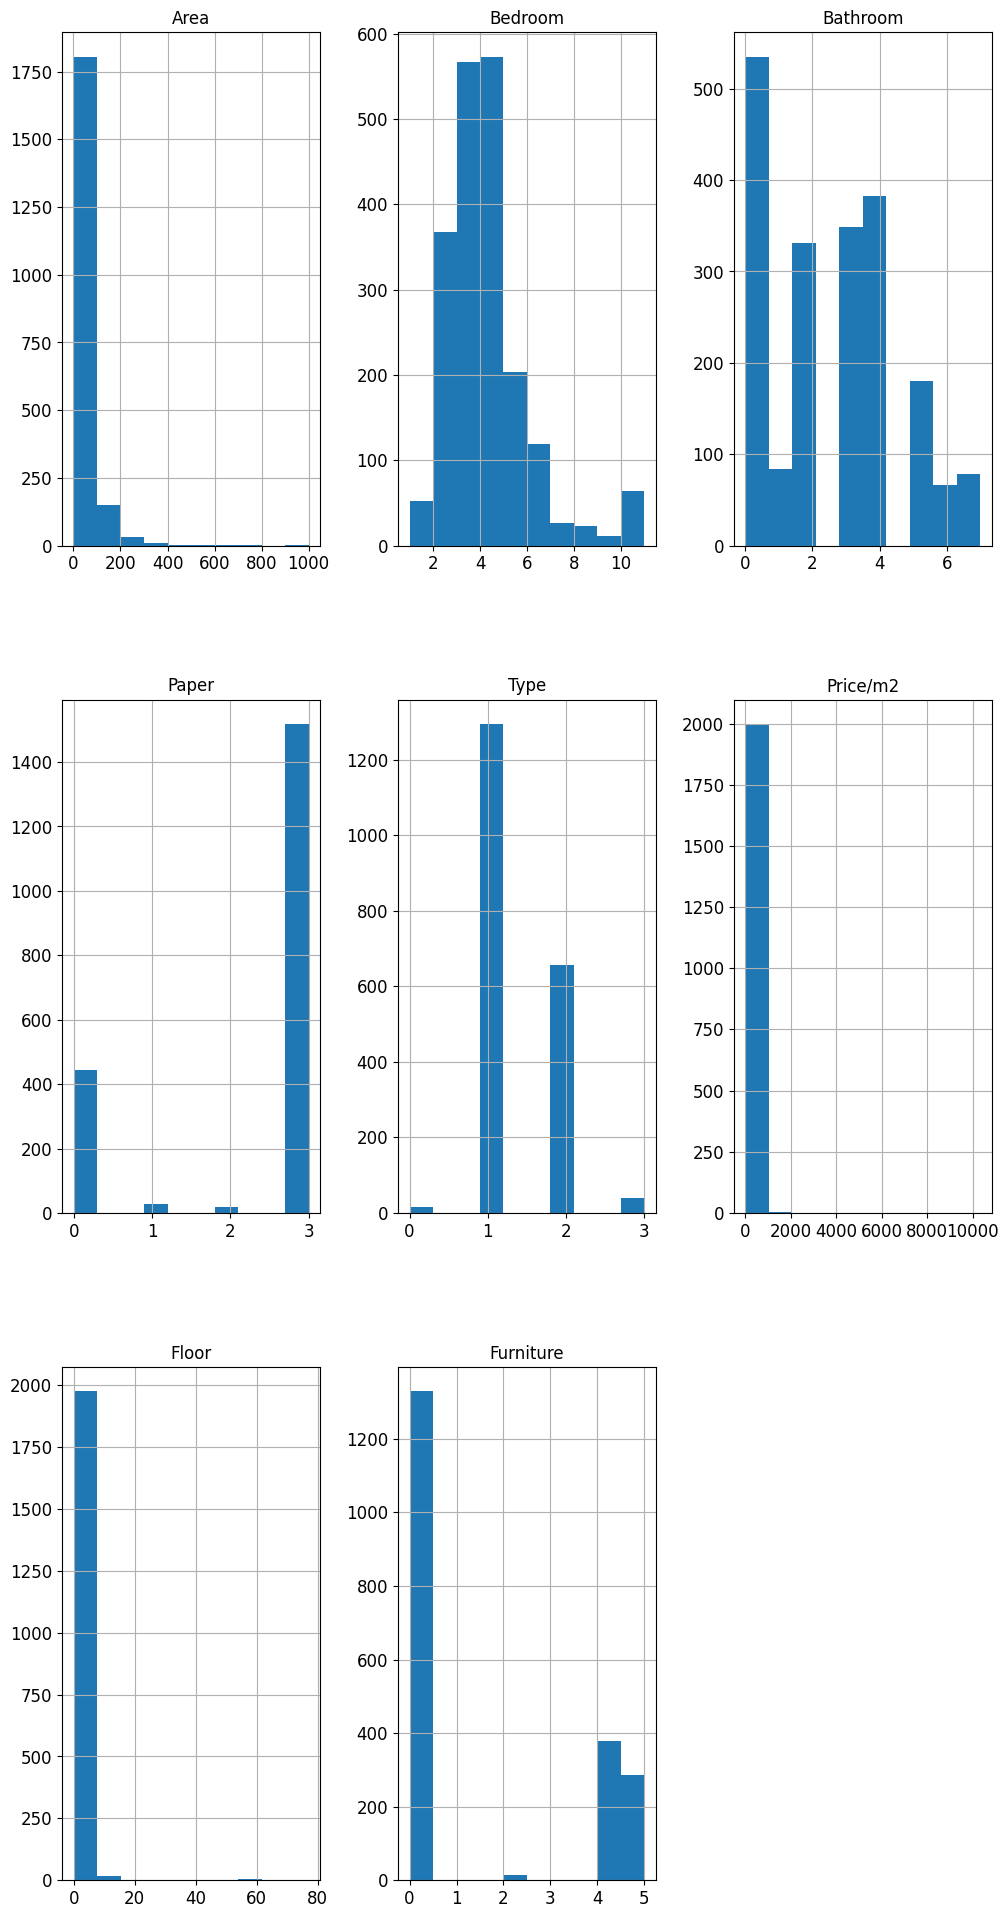

In [24]:
df_num = df.select_dtypes(include=["float64", "int64"])


df_num.hist(figsize=(12, 24), bins=10, xlabelsize=12, ylabelsize=12)

<Axes: >

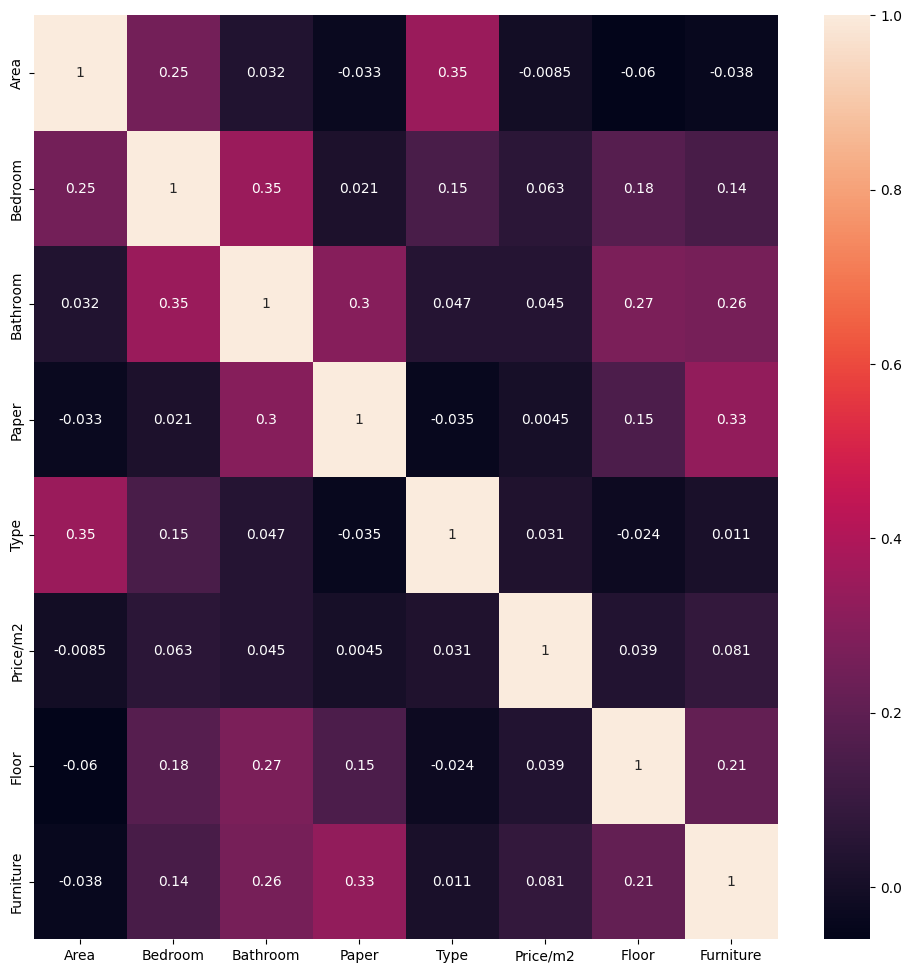

In [25]:
df_num = df.select_dtypes(include=["float64", "int64"])
# df_num.hist(figsize=(12, 24), bins=10, xlabelsize=12, ylabelsize=12)
plt.figure(figsize=(12, 12))
sns.heatmap(df_num.corr(), annot=True)



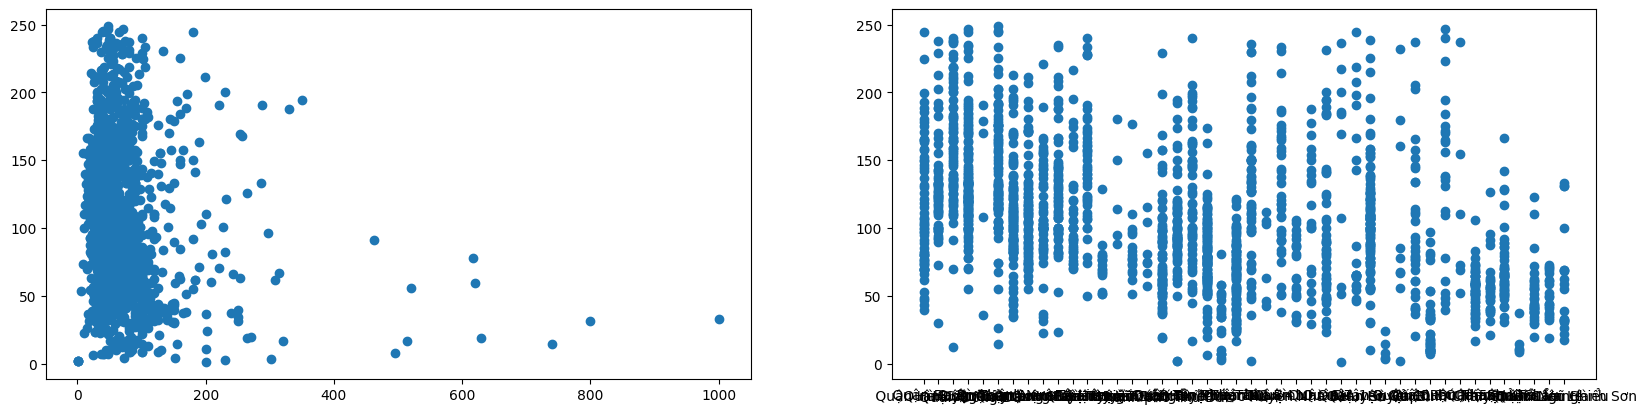

In [107]:
# f, (ax1, ax2) = plt.subplots(1, 2)
# f.set_figwidth(20, forward=True)

# k = df.copy()

# Q1 = df["Price/m2"].quantile(0.25)
# Q3 = df["Price/m2"].quantile(0.75)
# IQR = Q3 - Q1
# k = k[(k["Price/m2"] > (Q1 - 1.5 * IQR)) & (k["Price/m2"] < (Q3 + 1.5 * IQR))]

# ax1.scatter(y=k["Price/m2"], x=k["Area"])
# ax2.scatter(y=k["Price/m2"], x=k["District"])

# plt.show()
# có độ tương quan

C:\Users\huyld\AppData\Local\Temp\ipykernel_11868\2536851423.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["Price/m2"], color="g", hist_kws={"alpha": 0.4})


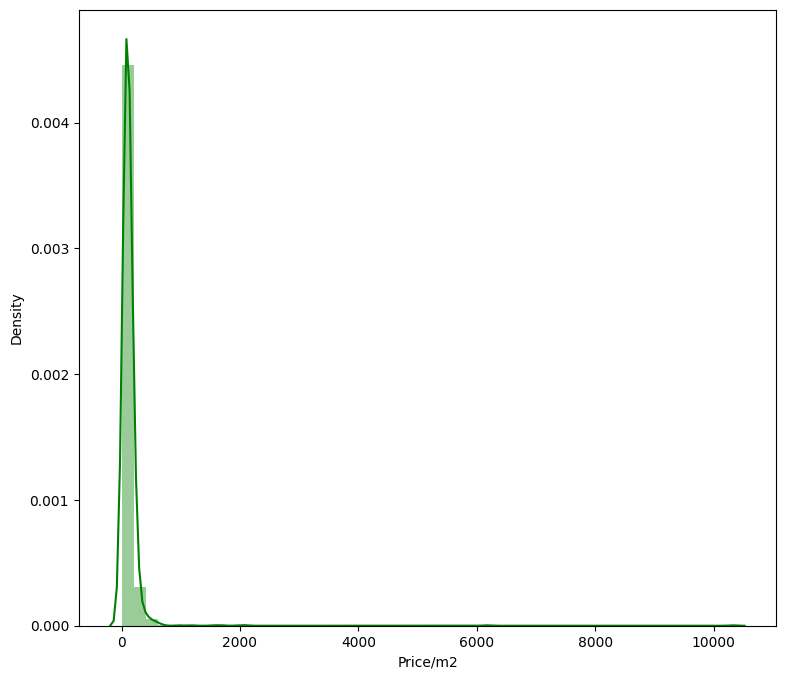

In [26]:
plt.figure(figsize=(9, 8))
sns.distplot(df["Price/m2"], color="g", hist_kws={"alpha": 0.4})

plt.show()

C:\Users\huyld\AppData\Local\Temp\ipykernel_11868\1581070014.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(temp, color="g", hist_kws={"alpha": 0.4})


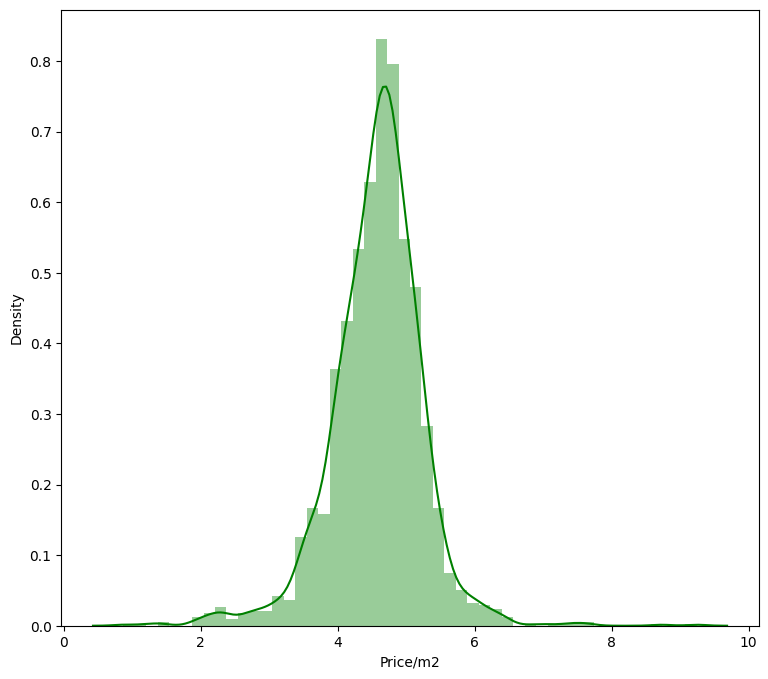

In [27]:
# convert lai phan gia ca
import math

temp = df["Price/m2"].apply(lambda x: math.log(x))


plt.figure(figsize=(9, 8))
sns.distplot(temp, color="g", hist_kws={"alpha": 0.4})

plt.show()

C:\Users\huyld\AppData\Local\Temp\ipykernel_17252\2360018363.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["Area"], color="g", hist_kws={"alpha": 0.4})


<Axes: xlabel='Area', ylabel='Density'>

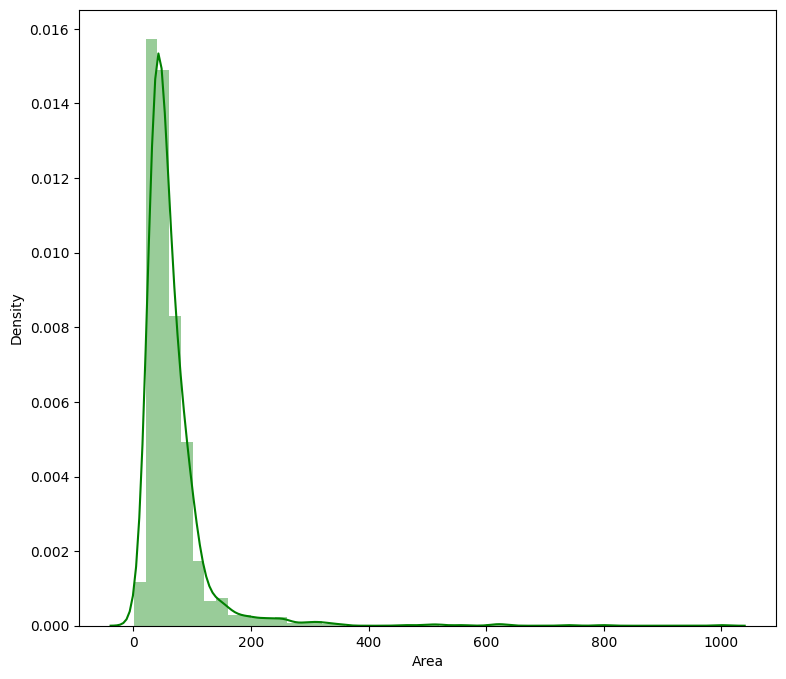

In [72]:
plt.figure(figsize=(9, 8))
sns.distplot(df["Area"], color="g", hist_kws={"alpha": 0.4})

C:\Users\huyld\AppData\Local\Temp\ipykernel_17252\1506067740.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(temp_area, color="g", hist_kws={"alpha": 0.4})


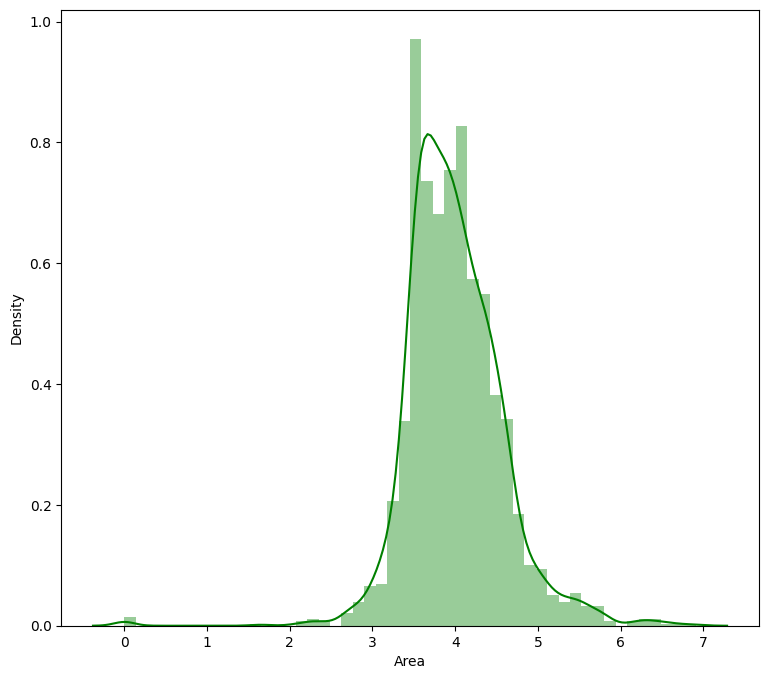

In [73]:
import math

temp_area = df["Area"].apply(lambda x: math.log(x))


plt.figure(figsize=(9, 8))
sns.distplot(temp_area, color="g", hist_kws={"alpha": 0.4})

plt.show()

C:\Users\huyld\AppData\Local\Temp\ipykernel_17252\18020573.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["Bedroom"], color="g", hist_kws={"alpha": 0.4})


<Axes: xlabel='Bedroom', ylabel='Density'>

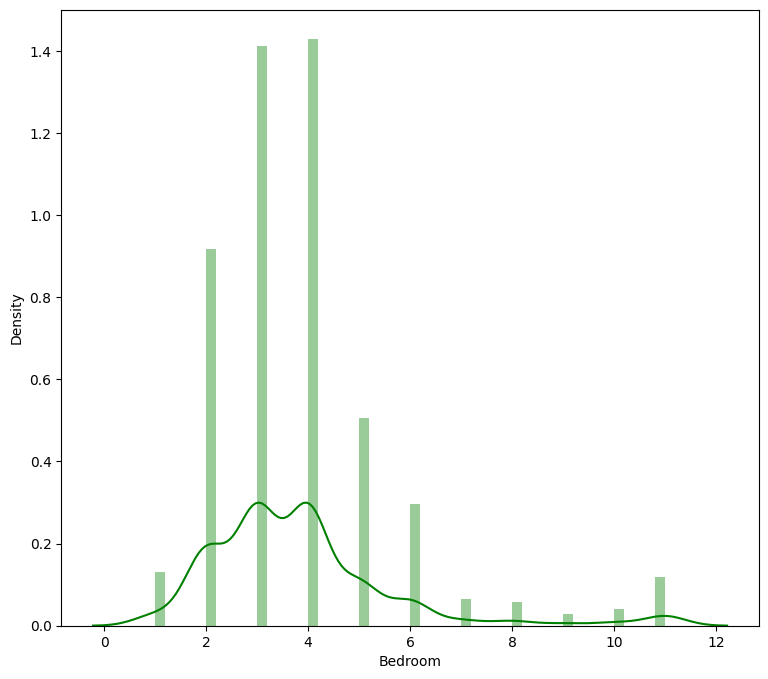

In [74]:
plt.figure(figsize=(9, 8))
sns.distplot(df["Bedroom"], color="g", hist_kws={"alpha": 0.4})

In [102]:
df.dropna(subset=["Price/m2"], inplace=True)

In [103]:
df.isnull().sum()

Area         0
Bedroom      0
Bathroom     0
Paper        0
Type         0
Price/m2     0
Floor        0
Furniture    0
District     0
dtype: int64

In [30]:
df.columns

Index(['Area', 'Bedroom', 'Bathroom', 'Paper', 'Type', 'Price/m2', 'Floor',
       'Furniture', 'District'],
      dtype='object')

In [105]:
df["Area"] = df["Area"].apply(lambda x: math.log(x))
df["Price/m2"] = df["Price/m2"].apply(lambda x: math.log(x))

<Axes: >

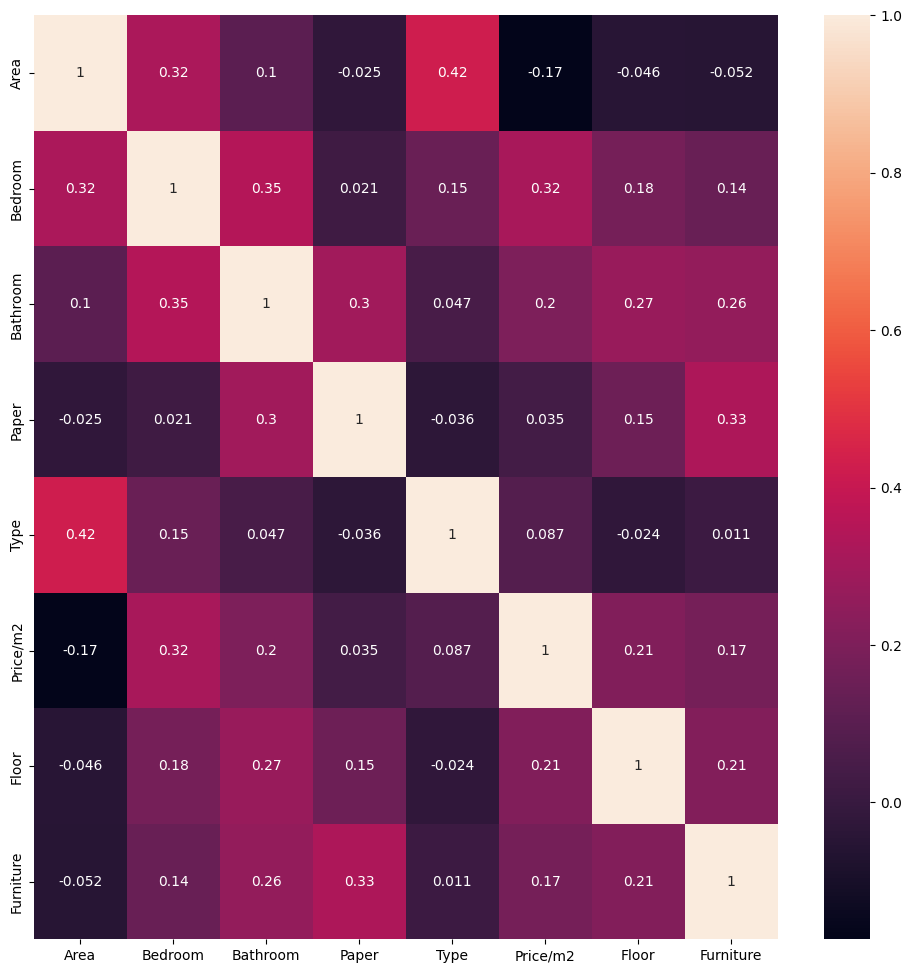

In [106]:
df_num = df.select_dtypes(include=["float64", "int64"])
# df_num.hist(figsize=(12, 24), bins=10, xlabelsize=12, ylabelsize=12)
plt.figure(figsize=(12, 12))
sns.heatmap(df_num.corr(), annot=True)

In [36]:
# df.dropna(subset=["Area"], inplace=True)df

<Axes: >

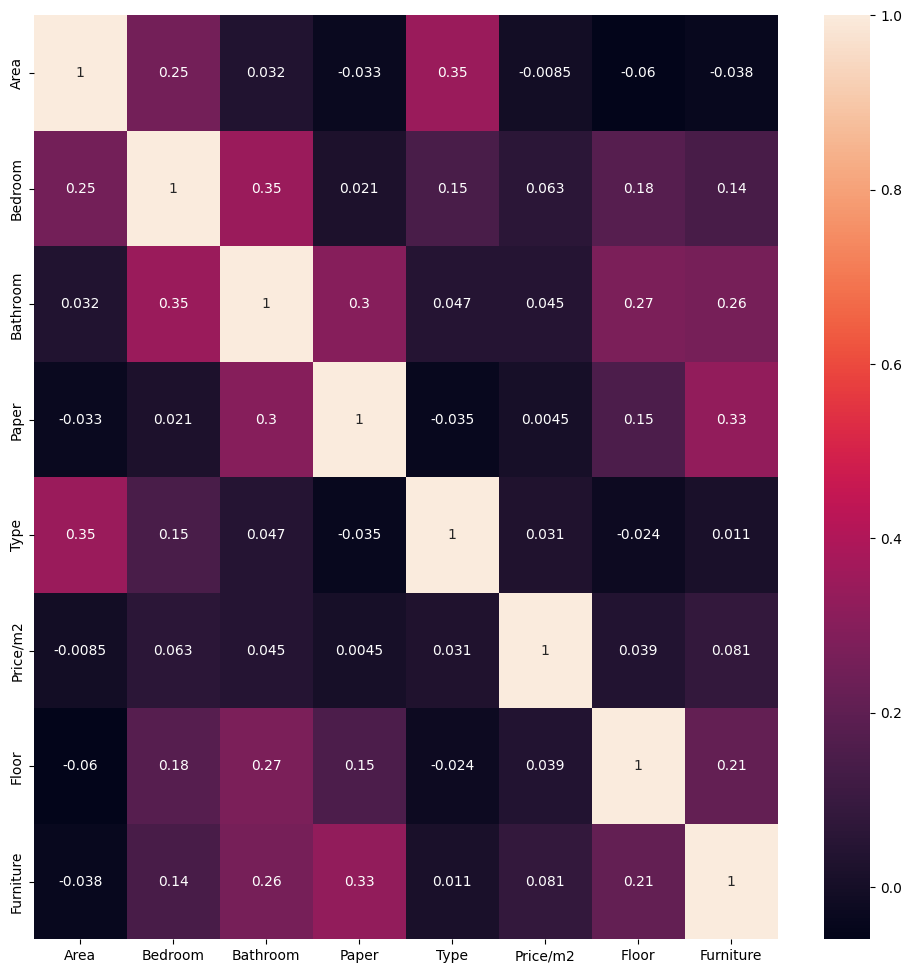

In [31]:
df_num = df.select_dtypes(include=["float64", "int64"])
# df_num.hist(figsize=(12, 24), bins=10, xlabelsize=12, ylabelsize=12)
plt.figure(figsize=(12, 12))
sns.heatmap(df_num.corr(), annot=True)

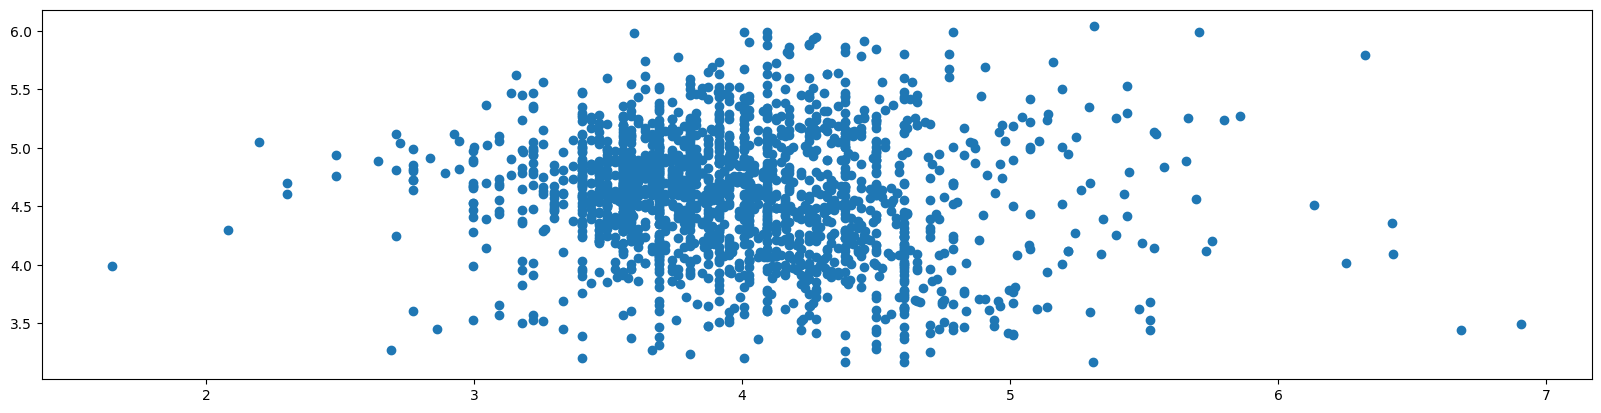

In [110]:
f, (ax1) = plt.subplots(1)
f.set_figwidth(20, forward=True)

k = df.copy()

Q1 = df["Price/m2"].quantile(0.25)
Q3 = df["Price/m2"].quantile(0.75)
IQR = Q3 - Q1
k = k[(k["Price/m2"] > (Q1 - 1.5 * IQR)) & (k["Price/m2"] < (Q3 + 1.5 * IQR))]

ax1.scatter(y=k["Price/m2"], x=k["Area"])

plt.show()

<Axes: xlabel='Paper', ylabel='Price/m2'>

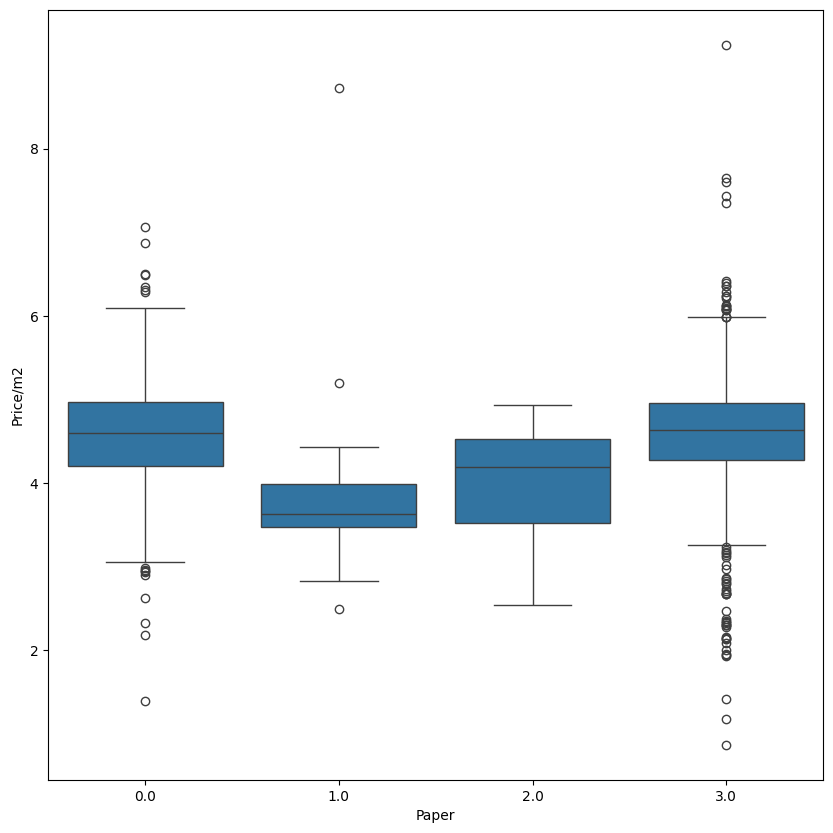

In [111]:
plt.figure(figsize=(10, 10))
k = df[["Price/m2", "Paper"]]


# k = k[(k['Price']> (Q1_Price-1.5*IQR_Price)) & (k['Price']<(Q3_Price+1.5*IQR_Price))]
sns.boxplot(data=k[["Price/m2", "Paper"]], x="Paper", y="Price/m2")

<Axes: xlabel='Floor', ylabel='Price/m2'>

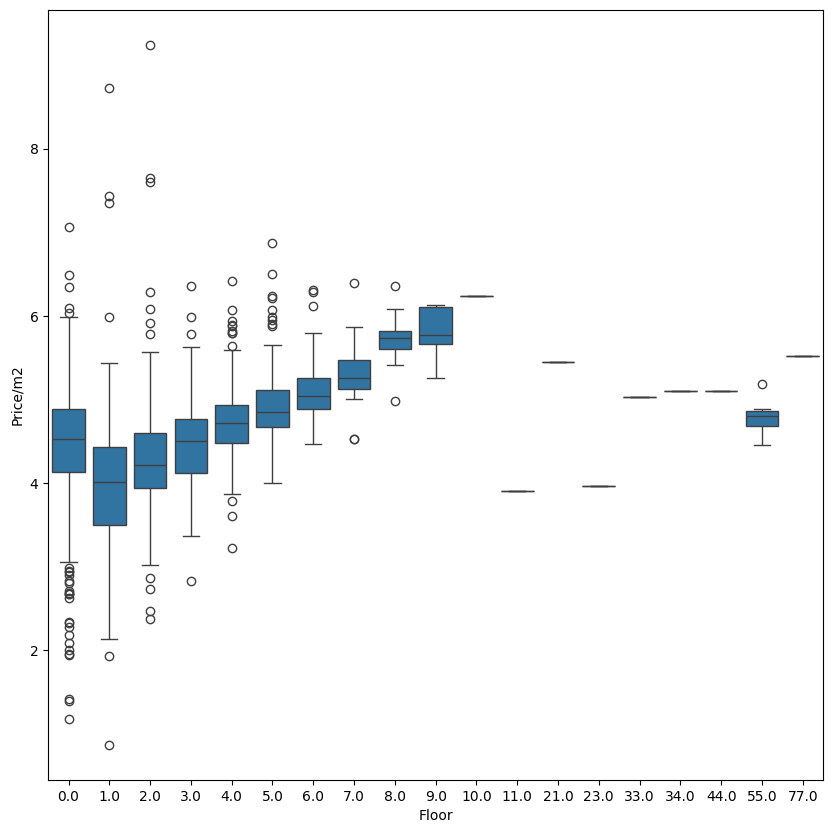

In [116]:
plt.figure(figsize=(10, 10))
k = df[["Price/m2", "Floor"]]


# k = k[(k['Price']> (Q1_Price-1.5*IQR_Price)) & (k['Price']<(Q3_Price+1.5*IQR_Price))]
sns.boxplot(data=k[["Price/m2", "Floor"]], x="Floor", y="Price/m2")

In [121]:
df["Type"].groupby("Type")

KeyError: 'Type'

In [30]:
df["Area"]

0        31.0
1        40.0
2        39.0
3        40.0
4       288.0
        ...  
2001     73.0
2002     64.0
2003    100.0
2004     70.0
2005    100.0
Name: Area, Length: 2006, dtype: float64